**Linear  regression**

**Y=wX+b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

dw.png

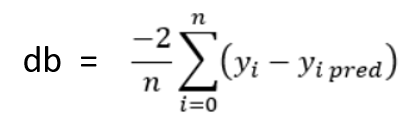

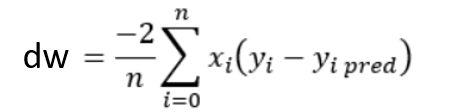

In [ ]:
import numpy as np

**Linear Regression**

In [ ]:
class Linear_Regression():

  #initiating the parameters (learning rate & no.of iterations)
  def __init__(self,learning_rate,no_of_iterations ):   #init funtion to initiate the parameters

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):      # fit the data to our model

    # number of training examples and number of features

    self.m,self.n=X.shape # number of rows and columns

    #initating the weight and bias

    self.w=np.zeros(self.n)   # weight is an array because weight is equal to no of features
    self.b=0
    self.X=X
    self.Y=Y

    #implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):   #update weight based on the gradient result

    Y_prediction=self.predict(self.X)

    #calculate gradients

    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m

    db=-2*np.sum(self.Y-Y_prediction)/self.m

    #updating the weights

    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):   #predict the salary of the person

    return X.dot(self.w) + self.b



Using linear regression model for prediction

In [ ]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data preprocessing

In [ ]:
# loading the data from csv files to a pandas dataframe
salary_data=pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
#checking the missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting feature and target

In [ ]:
#X=salary_data.drop(columns='YearsExperience',axis=1)
#Y=salary_data['Salary']
X=salary_data.iloc[:,:-1].values  # selects all rows and all columns except the last one.
Y=salary_data.iloc[:,1].values    #selects all rows from column index 1 (the second column).



In [ ]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

Training the linear Regression model

In [ ]:
model=Linear_Regression(learning_rate=0.002,no_of_iterations=1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
#printing the parameter values(weights & bias)

print('weight=',model.w[0])  # first element in the numpy array
print('bias=',model.b)

weight= 10945.020784583106
bias= 13472.151907043792


y=9514(x)+23697
salary=9514(experience)+23697

Predict the salary value for test data

In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 27700.678927    25511.67477009  62724.74543767  53968.72881
  91181.79947758  79142.27661454 103221.32234063  46307.21426079
  35362.19347621  87898.29324221]


Visualizing the predict values and actual values

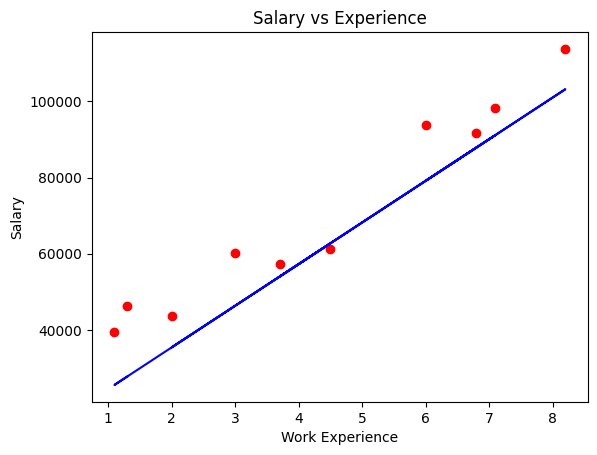

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()